Start by importing the mammographic_masses.data.txt file into a Pandas dataframe and take a look at it.

In [1]:
import pandas as pd
%matplotlib inline

masses_data = pd.read_csv('mammographic_masses.data.txt')
masses_data.head()

,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


Make sure you use the optional parmaters in read_csv to convert missing data (indicated by a ?) into NaN, and to add the appropriate column names (BI_RADS, age, shape, margin, density, and severity):

In [2]:
masses_data = pd.read_csv('mammographic_masses.data.txt', na_values=['?'], names = ['BI-RADS', 'age', 'shape', 'margin', 'density', 'severity'])
masses_data.head()

,BI-RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


Evaluate whether the data needs cleaning ... your model is only as good as the data it's given.

In [3]:
masses_data.describe()

,BI-RADS,age,shape,margin,density,severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


#### checking for any null values in all columns

In [4]:
null_series = masses_data.isnull().sum()
count =0
for col, val in null_series.items():
    if(val>0):
        print (col + "      "+ str(val))
    else:
        count = count +1
print("Number of columns with no null values: "+ str(count))

BI-RADS      2
age      5
shape      31
margin      48
density      76
Number of columns with no null values: 1


In [5]:
x_data = masses_data['age']
y_data = masses_data['severity']

#### checking for outliers in all the columns

In [6]:
no_outliers=0
for column in masses_data.columns:
    val=len(masses_data[(masses_data[column]!=0) & (masses_data[column]!=1)])
    if(val>0):
        print(column+" has "+str(val)+" rows with value other than 0,1")
    else:
        no_outliers=no_outliers+1
print("Total number of features with values only 0,1: "+str(no_outliers))

BI-RADS has 956 rows with value other than 0,1
age has 961 rows with value other than 0,1
shape has 737 rows with value other than 0,1
margin has 604 rows with value other than 0,1
density has 945 rows with value other than 0,1
Total number of features with values only 0,1: 1


There are quite a few missing values in the data set. Before we just drop every row that's missing data, let's make sure we don't bias our data in doing so. Does there appear to be any sort of correlation to what sort of data has missing fields? If there were, we'd have to try and go back and fill that data in.

In [7]:
masses_data.loc[(masses_data['age'].isnull()) |
              (masses_data['shape'].isnull()) |
              (masses_data['margin'].isnull()) |
              (masses_data['density'].isnull())]

,BI-RADS,age,shape,margin,density,severity
1,4.0,43.0,1.0,1.0,NaN,1
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
...,...,...,...,...,...,...
778,4.0,60.0,NaN,4.0,3.0,0
819,4.0,35.0,3.0,NaN,2.0,0
824,6.0,40.0,NaN,3.0,4.0,1
884,5.0,NaN,4.0,4.0,3.0,1


In [8]:
masses_data.dropna(inplace=True)
masses_data.describe()

,BI-RADS,age,shape,margin,density,severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [9]:
features = masses_data[['age', 'shape',
                             'margin', 'density']].values
classes = masses_data['severity'].values
feature_names = [ 'age', 'shape', 'margin', 'density']
features

array([[67.,  3.,  5.,  3.],
       [58.,  4.,  5.,  3.],
       [28.,  1.,  1.,  3.],
       ...,
       [64.,  4.,  5.,  3.],
       [66.,  4.,  5.,  3.],
       [62.,  3.,  3.,  3.]])

In [10]:
classes

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,

## Decision Trees

start by creating a single train/test split of our data. Set aside 75% for training, and 25% for testing.

In [11]:
import numpy
from sklearn.model_selection import train_test_split

numpy.random.seed(1234)

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(features, classes, train_size=0.75, random_state=1)

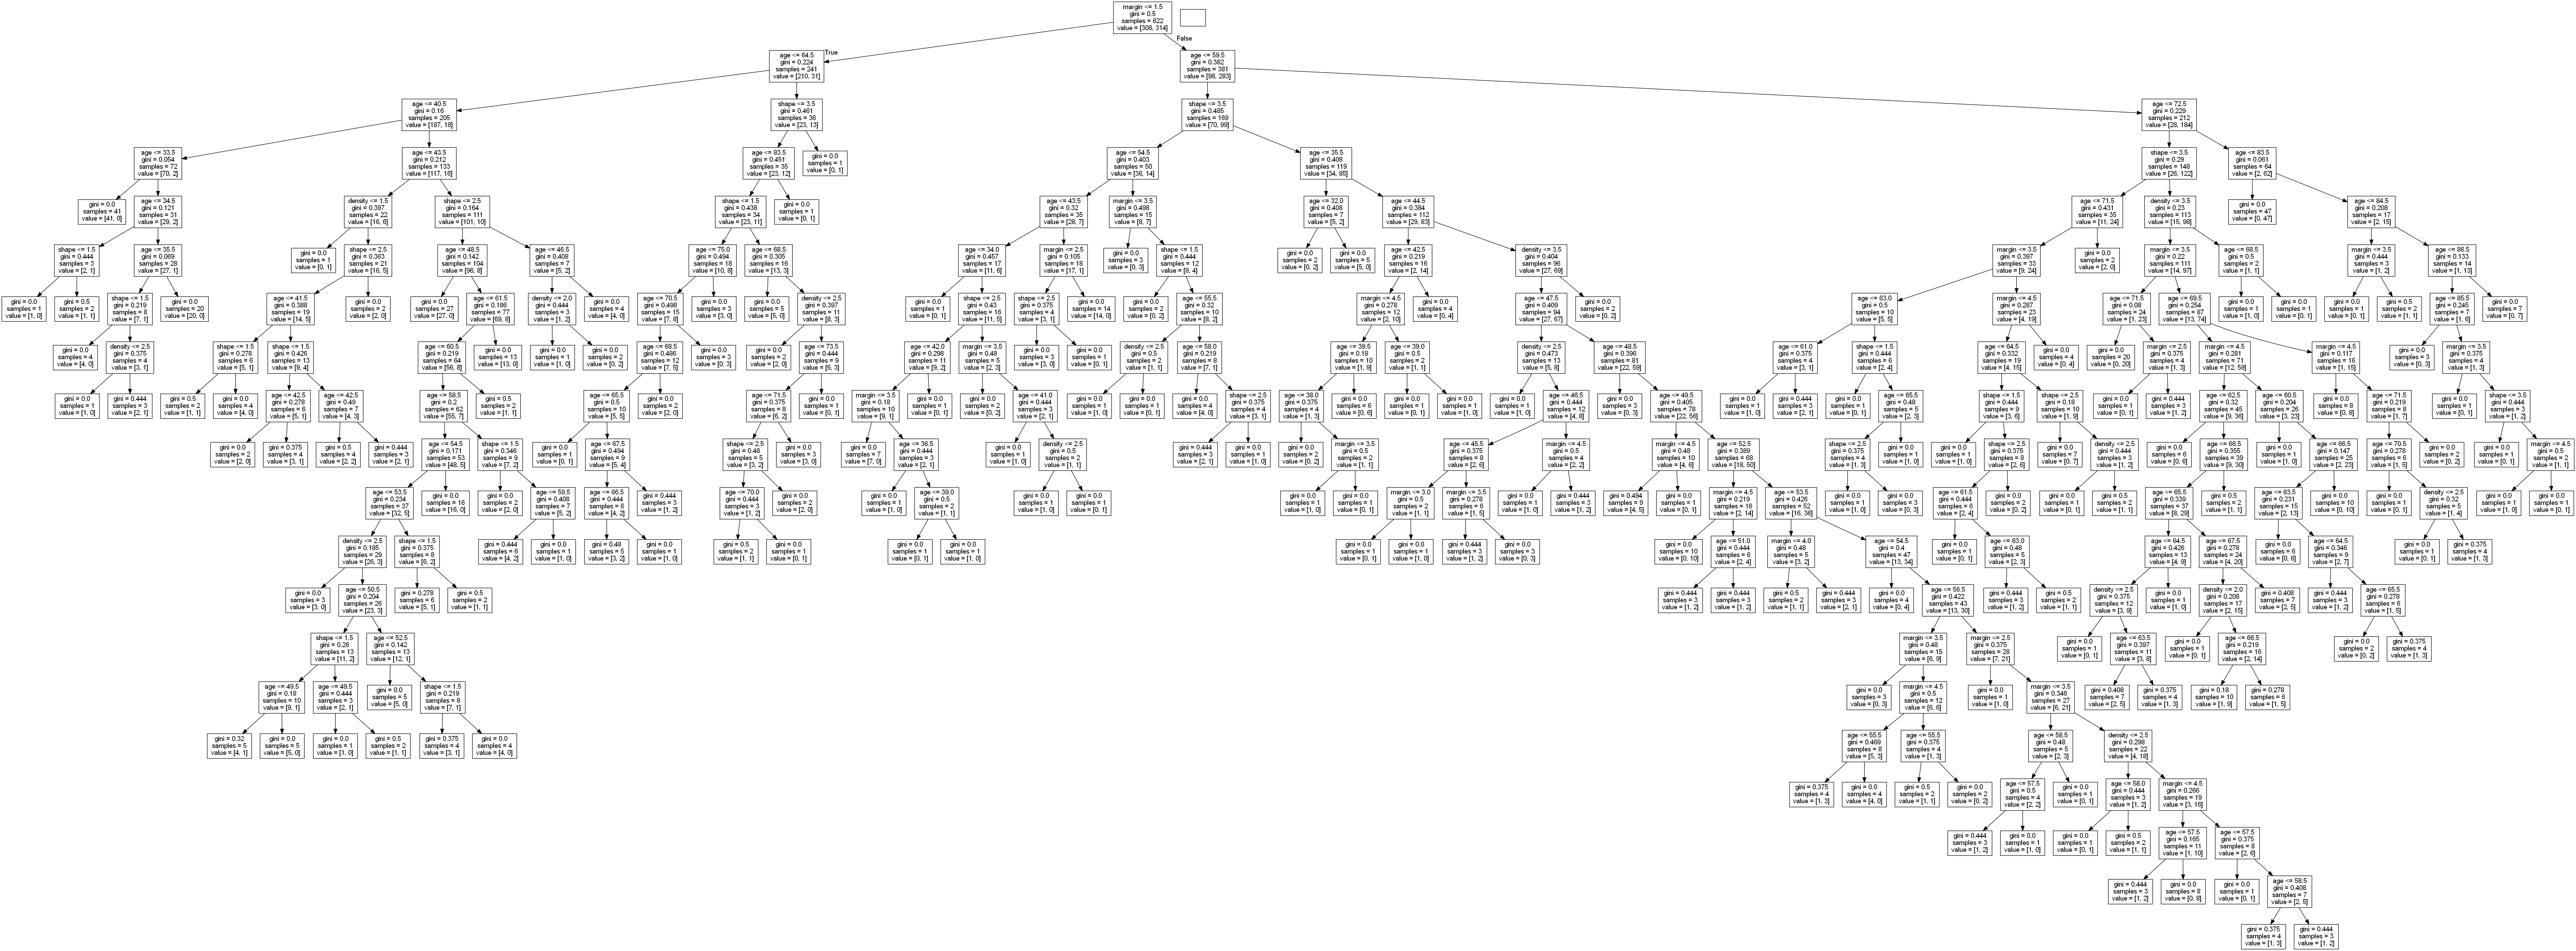

In [13]:
from sklearn.tree import DecisionTreeClassifier

DT= DecisionTreeClassifier(random_state=1)
DT.fit(training_inputs, training_classes)

from IPython.display import Image  
from io import StringIO
from sklearn import tree

import pydotplus

dot_data = StringIO()  
tree.export_graphviz(DT, out_file=dot_data,  
                         feature_names=feature_names)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score, f1_score

y_pred = DT.predict(testing_inputs)

accuracy = accuracy_score(y_pred, testing_classes)
precision = precision_score(testing_classes, y_pred, average='weighted')
recall = recall_score(testing_classes, y_pred, average='weighted')
f1 = f1_score(testing_classes, y_pred, average='weighted')

print("Accuracy: {:.8f}".format(accuracy))
print("Precision: {:.8f}".format(precision))
print("Recall: {:.8f}".format(recall))
print("F1 Score: {:.8f}".format(f1))

conf_matrix = confusion_matrix(testing_classes, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.74038462
Precision: 0.74336731
Recall: 0.74038462
F1 Score: 0.74126038
Confusion Matrix:
[[89 30]
 [24 65]]


# RandomForestClassifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=50, random_state=1)
RF.fit(training_inputs, training_classes)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = RF.predict(testing_inputs)

accuracy = accuracy_score(testing_classes, y_pred)
precision = precision_score(testing_classes, y_pred, average='weighted')
recall = recall_score(testing_classes, y_pred, average='weighted')
f1 = f1_score(testing_classes, y_pred, average='weighted')

print("Accuracy: {:.8f}".format(accuracy))
print("Precision: {:.8f}".format(precision))
print("Recall: {:.8f}".format(recall))
print("F1 Score: {:.8f}".format(f1))

conf_matrix = confusion_matrix(testing_classes, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.77403846
Precision: 0.78443972
Recall: 0.77403846
F1 Score: 0.77521975
Confusion Matrix:
[[88 31]
 [16 73]]


## NAIVE BAYES

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

MNB = MultinomialNB()
MNB.fit(training_inputs, training_classes)

y_pred = MNB.predict(testing_inputs)

accuracy = accuracy_score(testing_classes, y_pred)
precision = precision_score(testing_classes, y_pred, average='weighted')
recall = recall_score(testing_classes, y_pred, average='weighted')
f1 = f1_score(testing_classes, y_pred, average='weighted')

print("Accuracy: {:.8f}".format(accuracy))
print("Precision: {:.8f}".format(precision))
print("Recall: {:.8f}".format(recall))
print("F1 Score: {:.8f}".format(f1))

conf_matrix = confusion_matrix(testing_classes, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.75000000
Precision: 0.78186668
Recall: 0.75000000
F1 Score: 0.75000000
Confusion Matrix:
[[78 41]
 [11 78]]


## SVM

svm.SVC perform differently with different kernels. The choice of kernel is an example of a "hyperparamter." Try the rbf, sigmoid, and poly kernels and see what the best-performing kernel is.

In [25]:
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Linear Kernel
C = 1.0
linear_svc = svm.SVC(kernel='linear', C=C)
linear_svc.fit(training_inputs, training_classes)
linear_y_pred = linear_svc.predict(testing_inputs)

linear_accuracy = accuracy_score(testing_classes, linear_y_pred)
linear_precision = precision_score(testing_classes, linear_y_pred, average='weighted')
linear_recall = recall_score(testing_classes, linear_y_pred, average='weighted')
linear_f1 = f1_score(testing_classes, linear_y_pred, average='weighted')

print("Linear Kernel:")
print("Accuracy: {:.8f}".format(linear_accuracy))
print("Precision: {:.8f}".format(linear_precision))
print("Recall: {:.8f}".format(linear_recall))
print("F1 Score: {:.8f}".format(linear_f1))

# RBF Kernel
C = 1.0
rbf_svc = svm.SVC(kernel='rbf', C=C)
rbf_svc.fit(training_inputs, training_classes)
rbf_y_pred = rbf_svc.predict(testing_inputs)

rbf_accuracy = accuracy_score(testing_classes, rbf_y_pred)
rbf_precision = precision_score(testing_classes, rbf_y_pred, average='weighted')
rbf_recall = recall_score(testing_classes, rbf_y_pred, average='weighted')
rbf_f1 = f1_score(testing_classes, rbf_y_pred, average='weighted')

print("\nRBF Kernel:")
print("Accuracy: {:.8f}".format(rbf_accuracy))
print("Precision: {:.8f}".format(rbf_precision))
print("Recall: {:.8f}".format(rbf_recall))
print("F1 Score: {:.8f}".format(rbf_f1))

# Polynomial Kernel
C = 1.0
poly_svc = svm.SVC(kernel='poly', C=C)
poly_svc.fit(training_inputs, training_classes)
poly_y_pred = poly_svc.predict(testing_inputs)

poly_accuracy = accuracy_score(testing_classes, poly_y_pred)
poly_precision = precision_score(testing_classes, poly_y_pred, average='weighted')
poly_recall = recall_score(testing_classes, poly_y_pred, average='weighted')
poly_f1 = f1_score(testing_classes, poly_y_pred, average='weighted')

print("\nPolynomial Kernel:")
print("Accuracy: {:.8f}".format(poly_accuracy))
print("Precision: {:.8f}".format(poly_precision))
print("Recall: {:.8f}".format(poly_recall))
print("F1 Score: {:.8f}".format(poly_f1))

Linear Kernel:
Accuracy: 0.76923077
Precision: 0.80191454
Recall: 0.76923077
F1 Score: 0.76923077

RBF Kernel:
Accuracy: 0.72115385
Precision: 0.73710375
Recall: 0.72115385
F1 Score: 0.72244588

Polynomial Kernel:
Accuracy: 0.75961538
Precision: 0.77340452
Recall: 0.75961538
F1 Score: 0.76081954


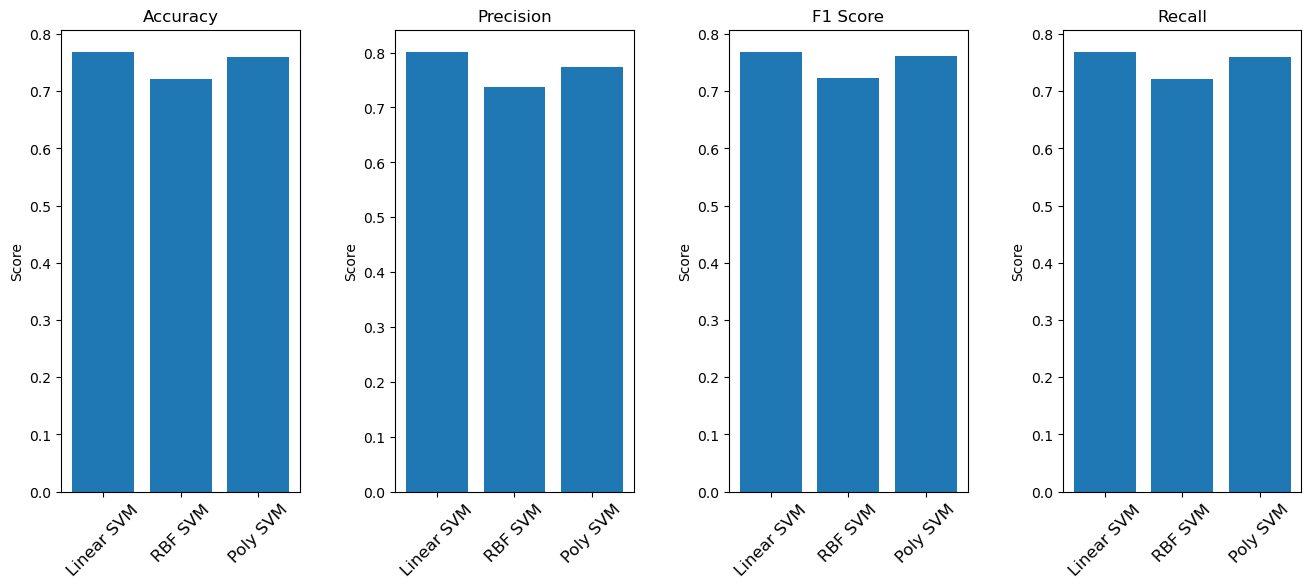

In [26]:
import matplotlib.pyplot as plt

# Data for models and their scores (replace with your actual data)
models = ['Linear SVM', 'RBF SVM', 'Poly SVM']
accuracy_scores = [linear_accuracy, rbf_accuracy, poly_accuracy]
precision_scores = [linear_precision, rbf_precision, poly_precision]
f1_scores = [linear_f1, rbf_f1, poly_f1]
recall_scores = [linear_recall, rbf_recall, poly_recall]

# Create subplots with a larger figure size
plt.figure(figsize=(16, 6))  # Adjust the figure width and height as needed

# Plot Accuracy
plt.subplot(141)  # Four subplots in one row
plt.bar(models, accuracy_scores)
plt.title('Accuracy')
plt.ylabel('Score')
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels and set font size

# Plot Precision
plt.subplot(142)
plt.bar(models, precision_scores)
plt.title('Precision')
plt.ylabel('Score')
plt.xticks(rotation=45, fontsize=12)

# Plot F1 Score
plt.subplot(143)
plt.bar(models, f1_scores)
plt.title('F1 Score')
plt.ylabel('Score')
plt.xticks(rotation=45, fontsize=12)

# Plot Recall
plt.subplot(144)
plt.bar(models, recall_scores)
plt.title('Recall')
plt.ylabel('Score')
plt.xticks(rotation=45, fontsize=12)

# Adjust the width between subplots
plt.subplots_adjust(wspace=0.4)

# Display the plots
plt.show()

## KNN
How about K-Nearest-Neighbors? it's a lot easier than implementing KNN from scratch like we did earlier in the course. Start with a K of 10. K is an example of a hyperparameter - a parameter on the model itself which may need to be tuned for best results on your particular data set.

In [21]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

KNN = neighbors.KNeighborsClassifier(n_neighbors=10)
KNN.fit(training_inputs, training_classes)

y_pred = KNN.predict(testing_inputs)

accuracy = accuracy_score(testing_classes, y_pred)
precision = precision_score(testing_classes, y_pred, average='weighted')
recall = recall_score(testing_classes, y_pred, average='weighted')
f1 = f1_score(testing_classes, y_pred, average='weighted')

print("Accuracy: {:.8f}".format(accuracy))
print("Precision: {:.8f}".format(precision))
print("Recall: {:.8f}".format(recall))
print("F1 Score: {:.8f}".format(f1))

conf_matrix = confusion_matrix(testing_classes, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.74519231
Precision: 0.75775581
Recall: 0.74519231
F1 Score: 0.74649901
Confusion Matrix:
[[84 35]
 [18 71]]


c:\Users\Public\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Logistic Regression

We've tried all these fancy techniques, but fundamentally this is just a binary classification problem. Try Logisitic Regression, which is a simple way to tackling this sort of thing.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

LR = LogisticRegression()
LR.fit(training_inputs, training_classes)

y_pred = LR.predict(testing_inputs)

accuracy = accuracy_score(testing_classes, y_pred)
precision = precision_score(testing_classes, y_pred, average='weighted')
recall = recall_score(testing_classes, y_pred, average='weighted')
f1 = f1_score(testing_classes, y_pred, average='weighted')

print("Accuracy: {:.8f}".format(accuracy))
print("Precision: {:.8f}".format(precision))
print("Recall: {:.8f}".format(recall))
print("F1 Score: {:.8f}".format(f1))

conf_matrix = confusion_matrix(testing_classes, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.77403846
Precision: 0.79477163
Recall: 0.77403846
F1 Score: 0.77488029
Confusion Matrix:
[[84 35]
 [12 77]]


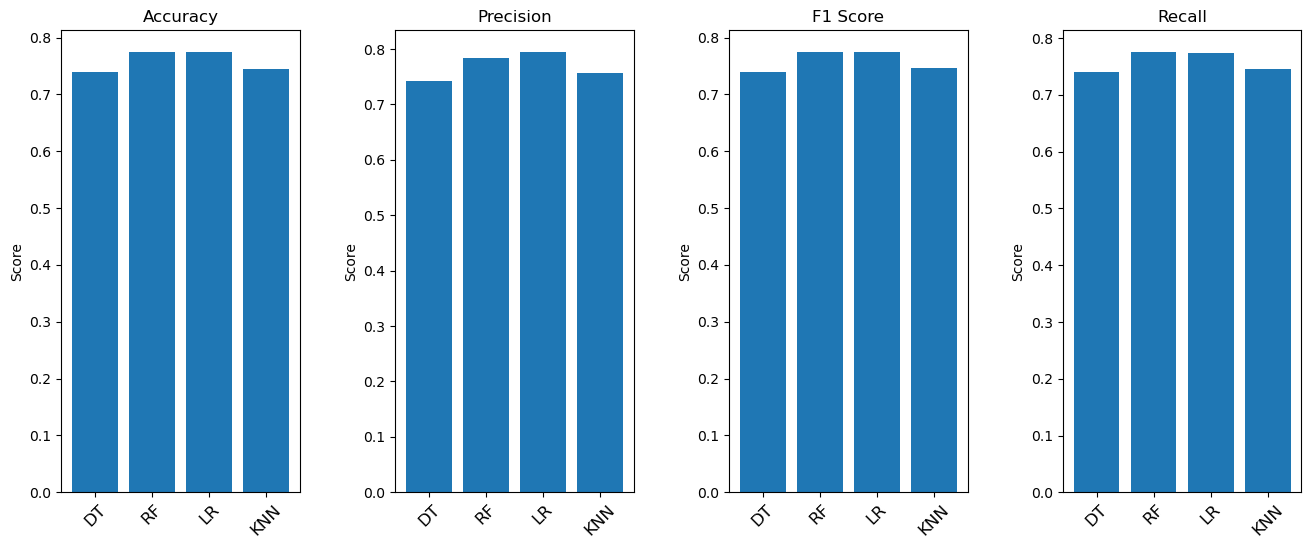

In [33]:
import matplotlib.pyplot as plt

# Data for models and their scores (replace with your actual data)
models = ['DT', 'RF', 'LR' , 'KNN']
accuracy_scores = [0.740, 0.774, 0.774,0.745]
precision_scores = [0.743, 0.784, 0.794,0.757]
f1_scores = [0.740, 0.774, 0.774,0.746]
recall_scores = [0.741, 0.775, 0.774,0.745]

# Create subplots with a larger figure size
plt.figure(figsize=(16, 6))  # Adjust the figure width and height as needed

# Plot Accuracy
plt.subplot(141)  # Four subplots in one row
plt.bar(models, accuracy_scores)
plt.title('Accuracy')
plt.ylabel('Score')
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels and set font size

# Plot Precision
plt.subplot(142)
plt.bar(models, precision_scores)
plt.title('Precision')
plt.ylabel('Score')
plt.xticks(rotation=45, fontsize=12)

# Plot F1 Score
plt.subplot(143)
plt.bar(models, f1_scores)
plt.title('F1 Score')
plt.ylabel('Score')
plt.xticks(rotation=45, fontsize=12)

# Plot Recall
plt.subplot(144)
plt.bar(models, recall_scores)
plt.title('Recall')
plt.ylabel('Score')
plt.xticks(rotation=45, fontsize=12)

# Adjust the width between subplots
plt.subplots_adjust(wspace=0.4)

# Display the plots
plt.show()


# Saving Model for Usage

In [23]:
import pickle as pkl
pkl.dump(RF, open('RF.pkl','wb'))